In [156]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.graph_objects as go  
from matplotlib.backends.backend_pdf import PdfPages

In [157]:
plt.rcParams["figure.figsize"] = [7.00, 3.50] 
plt.rcParams["figure.autolayout"] = True

In [158]:
#Read the file 
stockData = pd.read_csv("stock_data_large.csv")

#Display first 10 rows 
stockData.head(10)

,Date,Open,High,Low,Close,Volume
0,2015-01-01,373.44,404.73,345.87,349.57,2134615
1,2015-01-02,197.08,218.12,184.58,212.99,4240443
2,2015-01-05,399.27,419.56,357.80,383.83,2429851
3,2015-01-06,165.49,196.80,160.93,168.81,1353820
4,2015-01-07,441.49,475.20,420.16,467.26,2264712
5,2015-01-08,241.69,267.69,194.61,204.63,2022822
6,2015-01-09,446.21,476.70,433.34,469.07,1978605
7,2015-01-12,408.87,437.96,369.22,384.37,2092242
8,2015-01-13,147.74,181.69,126.48,138.57,443688
9,2015-01-14,482.26,507.06,473.29,499.57,4390780


In [159]:
#Check if there are any null values in any of the columns 
stockData.isnull().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [160]:
#Convert the Date column to proper timeframe objects 
stockData["Date"] = pd.to_datetime(stockData["Date"], format="%Y-%m-%d")

#View first 10 rows
stockData.head(10)

,Date,Open,High,Low,Close,Volume
0,2015-01-01,373.44,404.73,345.87,349.57,2134615
1,2015-01-02,197.08,218.12,184.58,212.99,4240443
2,2015-01-05,399.27,419.56,357.80,383.83,2429851
3,2015-01-06,165.49,196.80,160.93,168.81,1353820
4,2015-01-07,441.49,475.20,420.16,467.26,2264712
5,2015-01-08,241.69,267.69,194.61,204.63,2022822
6,2015-01-09,446.21,476.70,433.34,469.07,1978605
7,2015-01-12,408.87,437.96,369.22,384.37,2092242
8,2015-01-13,147.74,181.69,126.48,138.57,443688
9,2015-01-14,482.26,507.06,473.29,499.57,4390780


In [161]:
#confirm the type of date time object
type(stockData["Date"].loc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [162]:
#sort the data by date 
stockData = stockData.sort_values(by="Date")

#view the first 10 rows in the dataframe
stockData.head(10)

,Date,Open,High,Low,Close,Volume
0,2015-01-01,373.44,404.73,345.87,349.57,2134615
1,2015-01-02,197.08,218.12,184.58,212.99,4240443
2,2015-01-05,399.27,419.56,357.80,383.83,2429851
3,2015-01-06,165.49,196.80,160.93,168.81,1353820
4,2015-01-07,441.49,475.20,420.16,467.26,2264712
5,2015-01-08,241.69,267.69,194.61,204.63,2022822
6,2015-01-09,446.21,476.70,433.34,469.07,1978605
7,2015-01-12,408.87,437.96,369.22,384.37,2092242
8,2015-01-13,147.74,181.69,126.48,138.57,443688
9,2015-01-14,482.26,507.06,473.29,499.57,4390780


In [163]:
#new column to store the previous day's close
stockData["PreviousDayClose"] = stockData["Close"].shift(1)

#check the data 
stockData.head(10)

,Date,Open,High,Low,Close,Volume,PreviousDayClose
0,2015-01-01,373.44,404.73,345.87,349.57,2134615,NaN
1,2015-01-02,197.08,218.12,184.58,212.99,4240443,349.57
2,2015-01-05,399.27,419.56,357.80,383.83,2429851,212.99
3,2015-01-06,165.49,196.80,160.93,168.81,1353820,383.83
4,2015-01-07,441.49,475.20,420.16,467.26,2264712,168.81
5,2015-01-08,241.69,267.69,194.61,204.63,2022822,467.26
6,2015-01-09,446.21,476.70,433.34,469.07,1978605,204.63
7,2015-01-12,408.87,437.96,369.22,384.37,2092242,469.07
8,2015-01-13,147.74,181.69,126.48,138.57,443688,384.37
9,2015-01-14,482.26,507.06,473.29,499.57,4390780,138.57


In [164]:
#A new column is created "PriceChange" to compute difference between high and low
stockData["PriceChange"] = stockData.apply(lambda row : (row['High'] - row['Low']), axis=1)

#Check the dataframe
stockData.head(10)

,Date,Open,High,Low,Close,Volume,PreviousDayClose,PriceChange
0,2015-01-01,373.44,404.73,345.87,349.57,2134615,NaN,58.86
1,2015-01-02,197.08,218.12,184.58,212.99,4240443,349.57,33.54
2,2015-01-05,399.27,419.56,357.80,383.83,2429851,212.99,61.76
3,2015-01-06,165.49,196.80,160.93,168.81,1353820,383.83,35.87
4,2015-01-07,441.49,475.20,420.16,467.26,2264712,168.81,55.04
5,2015-01-08,241.69,267.69,194.61,204.63,2022822,467.26,73.08
6,2015-01-09,446.21,476.70,433.34,469.07,1978605,204.63,43.36
7,2015-01-12,408.87,437.96,369.22,384.37,2092242,469.07,68.74
8,2015-01-13,147.74,181.69,126.48,138.57,443688,384.37,55.21
9,2015-01-14,482.26,507.06,473.29,499.57,4390780,138.57,33.77


In [165]:
#percentage change in the close value foreach day from previous day 
stockData["PercentageChange"] = (stockData["Close"] - stockData["Close"].shift(1))/stockData["Close"].shift(1)*100

#check the dataframe
stockData.head(10)

,Date,Open,High,Low,Close,Volume,PreviousDayClose,PriceChange,PercentageChange
0,2015-01-01,373.44,404.73,345.87,349.57,2134615,NaN,58.86,NaN
1,2015-01-02,197.08,218.12,184.58,212.99,4240443,349.57,33.54,-39.070858
2,2015-01-05,399.27,419.56,357.80,383.83,2429851,212.99,61.76,80.210339
3,2015-01-06,165.49,196.80,160.93,168.81,1353820,383.83,35.87,-56.019592
4,2015-01-07,441.49,475.20,420.16,467.26,2264712,168.81,55.04,176.796398
5,2015-01-08,241.69,267.69,194.61,204.63,2022822,467.26,73.08,-56.206395
6,2015-01-09,446.21,476.70,433.34,469.07,1978605,204.63,43.36,129.228363
7,2015-01-12,408.87,437.96,369.22,384.37,2092242,469.07,68.74,-18.057006
8,2015-01-13,147.74,181.69,126.48,138.57,443688,384.37,55.21,-63.948799
9,2015-01-14,482.26,507.06,473.29,499.57,4390780,138.57,33.77,260.518150


In [166]:
#Calucate 5 day moving average 
stockData["FiveDay"] = stockData["Close"].rolling(window=5).mean()

#Calucate 10 day moving average 
stockData["TenDay"] = stockData["Close"].rolling(window=10).mean()

#Check the dataframe 
stockData.head(10)


,Date,Open,High,Low,Close,Volume,PreviousDayClose,PriceChange,PercentageChange,FiveDay,TenDay
0,2015-01-01,373.44,404.73,345.87,349.57,2134615,NaN,58.86,NaN,NaN,NaN
1,2015-01-02,197.08,218.12,184.58,212.99,4240443,349.57,33.54,-39.070858,NaN,NaN
2,2015-01-05,399.27,419.56,357.80,383.83,2429851,212.99,61.76,80.210339,NaN,NaN
3,2015-01-06,165.49,196.80,160.93,168.81,1353820,383.83,35.87,-56.019592,NaN,NaN
4,2015-01-07,441.49,475.20,420.16,467.26,2264712,168.81,55.04,176.796398,316.492,NaN
5,2015-01-08,241.69,267.69,194.61,204.63,2022822,467.26,73.08,-56.206395,287.504,NaN
6,2015-01-09,446.21,476.70,433.34,469.07,1978605,204.63,43.36,129.228363,338.720,NaN
7,2015-01-12,408.87,437.96,369.22,384.37,2092242,469.07,68.74,-18.057006,338.828,NaN
8,2015-01-13,147.74,181.69,126.48,138.57,443688,384.37,55.21,-63.948799,332.780,NaN
9,2015-01-14,482.26,507.06,473.29,499.57,4390780,138.57,33.77,260.518150,339.242,327.867


In [167]:
#replace all the null values with the zero
stockData = stockData.fillna(0)

#check the dataframe
stockData.head(10) 

,Date,Open,High,Low,Close,Volume,PreviousDayClose,PriceChange,PercentageChange,FiveDay,TenDay
0,2015-01-01,373.44,404.73,345.87,349.57,2134615,0.00,58.86,0.000000,0.000,0.000
1,2015-01-02,197.08,218.12,184.58,212.99,4240443,349.57,33.54,-39.070858,0.000,0.000
2,2015-01-05,399.27,419.56,357.80,383.83,2429851,212.99,61.76,80.210339,0.000,0.000
3,2015-01-06,165.49,196.80,160.93,168.81,1353820,383.83,35.87,-56.019592,0.000,0.000
4,2015-01-07,441.49,475.20,420.16,467.26,2264712,168.81,55.04,176.796398,316.492,0.000
5,2015-01-08,241.69,267.69,194.61,204.63,2022822,467.26,73.08,-56.206395,287.504,0.000
6,2015-01-09,446.21,476.70,433.34,469.07,1978605,204.63,43.36,129.228363,338.720,0.000
7,2015-01-12,408.87,437.96,369.22,384.37,2092242,469.07,68.74,-18.057006,338.828,0.000
8,2015-01-13,147.74,181.69,126.48,138.57,443688,384.37,55.21,-63.948799,332.780,0.000
9,2015-01-14,482.26,507.06,473.29,499.57,4390780,138.57,33.77,260.518150,339.242,327.867


In [168]:
#store the year in the seperate column
stockData["Year"] = pd.DatetimeIndex(stockData["Date"]).year

#Check the dataframe
stockData.head(10)

,Date,Open,High,Low,Close,Volume,PreviousDayClose,PriceChange,PercentageChange,FiveDay,TenDay,Year
0,2015-01-01,373.44,404.73,345.87,349.57,2134615,0.00,58.86,0.000000,0.000,0.000,2015
1,2015-01-02,197.08,218.12,184.58,212.99,4240443,349.57,33.54,-39.070858,0.000,0.000,2015
2,2015-01-05,399.27,419.56,357.80,383.83,2429851,212.99,61.76,80.210339,0.000,0.000,2015
3,2015-01-06,165.49,196.80,160.93,168.81,1353820,383.83,35.87,-56.019592,0.000,0.000,2015
4,2015-01-07,441.49,475.20,420.16,467.26,2264712,168.81,55.04,176.796398,316.492,0.000,2015
5,2015-01-08,241.69,267.69,194.61,204.63,2022822,467.26,73.08,-56.206395,287.504,0.000,2015
6,2015-01-09,446.21,476.70,433.34,469.07,1978605,204.63,43.36,129.228363,338.720,0.000,2015
7,2015-01-12,408.87,437.96,369.22,384.37,2092242,469.07,68.74,-18.057006,338.828,0.000,2015
8,2015-01-13,147.74,181.69,126.48,138.57,443688,384.37,55.21,-63.948799,332.780,0.000,2015
9,2015-01-14,482.26,507.06,473.29,499.57,4390780,138.57,33.77,260.518150,339.242,327.867,2015


In [169]:
#aggregate of total volume by the year
yearly_volume = stockData.groupby("Year").agg({'Volume' : 'sum'})

#check the new dataframe
yearly_volume

,Volume
Year,
2015,613823155
2016,680956608
2017,674741007
2018,638576717
2019,690610565
2020,691817256
2021,680247106
2022,685199166
2023,660238229


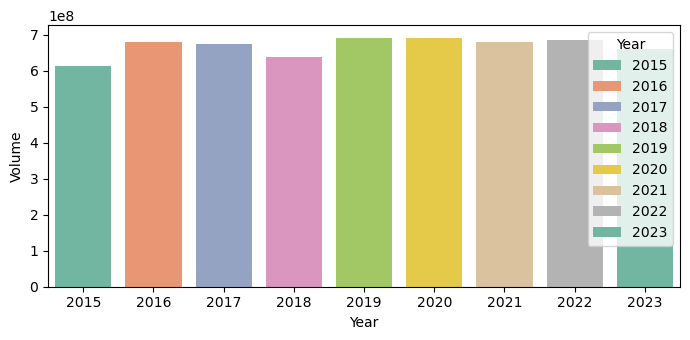

In [170]:
#plot the graph
fig1 = plt.figure()
sns.barplot(data = yearly_volume, x = "Year", y = "Volume", palette="Set2", hue = "Year")
plt.show()

In [171]:
#day with the highest trading volume 
stockData.loc[stockData["Volume"] == stockData["Volume"].max()]

,Date,Open,High,Low,Close,Volume,PreviousDayClose,PriceChange,PercentageChange,FiveDay,TenDay,Year
1235,2019-09-26,162.54,208.69,147.02,206.51,4998804,178.55,61.67,15.659479,281.378,286.263,2019


In [172]:
#days with price change higher than five percent 
stockData.loc[stockData["PercentageChange"] >= 5]

,Date,Open,High,Low,Close,Volume,PreviousDayClose,PriceChange,PercentageChange,FiveDay,TenDay,Year
2,2015-01-05,399.27,419.56,357.80,383.83,2429851,212.99,61.76,80.210339,0.000,0.000,2015
4,2015-01-07,441.49,475.20,420.16,467.26,2264712,168.81,55.04,176.796398,316.492,0.000,2015
6,2015-01-09,446.21,476.70,433.34,469.07,1978605,204.63,43.36,129.228363,338.720,0.000,2015
9,2015-01-14,482.26,507.06,473.29,499.57,4390780,138.57,33.77,260.518150,339.242,327.867,2015
12,2015-01-19,357.24,365.62,321.71,327.73,4745016,307.06,43.91,6.731583,324.872,331.850,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
2331,2023-12-08,469.93,509.30,439.52,478.54,863385,109.32,69.78,337.742408,359.950,290.925,2023
2334,2023-12-13,313.74,360.83,304.77,339.33,3568455,155.01,56.06,118.908458,259.072,298.679,2023
2337,2023-12-18,368.67,392.96,361.41,378.16,4619441,170.62,31.55,121.638729,263.544,291.975,2023
2340,2023-12-21,410.29,459.34,370.14,389.82,4661031,158.61,89.20,145.772650,273.520,282.824,2023


In [173]:
#new column day type to define if the day is 'Bullish' or 'Bearish'ArithmeticError
stockData["DayType"] = stockData.apply(lambda row : ( "Bullish" if row["Open"] > row["Close"] else  "Bearish"), axis=1)

#check the dataframe 
stockData.head(10)

,Date,Open,High,Low,Close,Volume,PreviousDayClose,PriceChange,PercentageChange,FiveDay,TenDay,Year,DayType
0,2015-01-01,373.44,404.73,345.87,349.57,2134615,0.00,58.86,0.000000,0.000,0.000,2015,Bullish
1,2015-01-02,197.08,218.12,184.58,212.99,4240443,349.57,33.54,-39.070858,0.000,0.000,2015,Bearish
2,2015-01-05,399.27,419.56,357.80,383.83,2429851,212.99,61.76,80.210339,0.000,0.000,2015,Bullish
3,2015-01-06,165.49,196.80,160.93,168.81,1353820,383.83,35.87,-56.019592,0.000,0.000,2015,Bearish
4,2015-01-07,441.49,475.20,420.16,467.26,2264712,168.81,55.04,176.796398,316.492,0.000,2015,Bearish
5,2015-01-08,241.69,267.69,194.61,204.63,2022822,467.26,73.08,-56.206395,287.504,0.000,2015,Bullish
6,2015-01-09,446.21,476.70,433.34,469.07,1978605,204.63,43.36,129.228363,338.720,0.000,2015,Bearish
7,2015-01-12,408.87,437.96,369.22,384.37,2092242,469.07,68.74,-18.057006,338.828,0.000,2015,Bullish
8,2015-01-13,147.74,181.69,126.48,138.57,443688,384.37,55.21,-63.948799,332.780,0.000,2015,Bullish
9,2015-01-14,482.26,507.06,473.29,499.57,4390780,138.57,33.77,260.518150,339.242,327.867,2015,Bearish


In [174]:
stockData_2015 = stockData.loc[stockData["Year"] == 2015]

In [185]:
fig_plt = go.Figure(data=[go.Candlestick(x=stockData_2015['Date'],
                open=stockData_2015['Open'],
                high=stockData_2015['High'],
                low=stockData_2015['Low'],
                close=stockData_2015['Close'])])

fig_plt.show()

In [176]:
stockDataSimplified = stockData.loc[stockData["Year"] != stockData["Year"].shift(-1)]

stockDataSimplified

,Date,Open,High,Low,Close,Volume,PreviousDayClose,PriceChange,PercentageChange,FiveDay,TenDay,Year,DayType
260,2015-12-31,336.22,358.33,327.41,356.60,4346979,466.51,30.92,-23.560052,321.080,306.397,2015,Bearish
521,2016-12-30,434.82,438.71,420.23,424.02,2144060,157.03,18.48,170.024836,314.624,326.687,2016,Bullish
781,2017-12-29,416.01,446.90,392.89,400.01,997355,309.49,54.01,29.248118,346.682,342.773,2017,Bullish
1042,2018-12-31,380.58,423.58,337.77,356.03,1864137,158.14,85.81,125.135955,284.276,248.207,2018,Bullish
1303,2019-12-31,121.22,166.62,81.36,122.52,4116092,356.75,85.26,-65.656622,291.082,323.877,2019,Bearish
1565,2020-12-31,241.05,283.66,195.41,247.05,2055380,304.43,88.25,-18.848340,225.398,267.392,2020,Bearish
1826,2021-12-31,443.07,468.63,394.08,443.44,3690819,437.54,74.55,1.348448,380.888,301.889,2021,Bearish
2086,2022-12-30,229.43,242.67,181.67,237.39,4822807,266.84,61.00,-11.036576,237.334,241.868,2022,Bearish
2346,2023-12-29,100.92,136.96,53.08,132.18,3674802,269.38,83.88,-50.931769,270.856,284.522,2023,Bearish


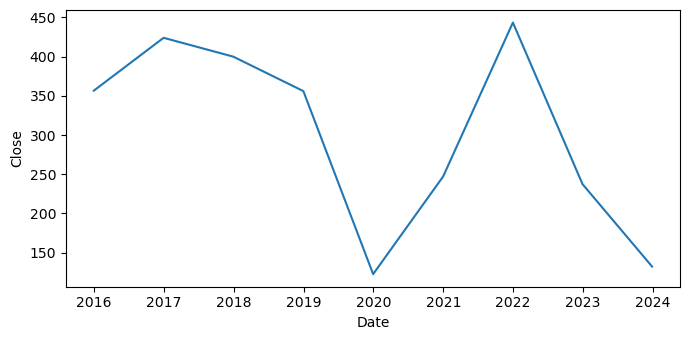

In [195]:
#Graph for price changes over time 
fig2 = plt.figure()
sns.lineplot(x = "Date",y = "Close", data=stockDataSimplified)
plt.show()

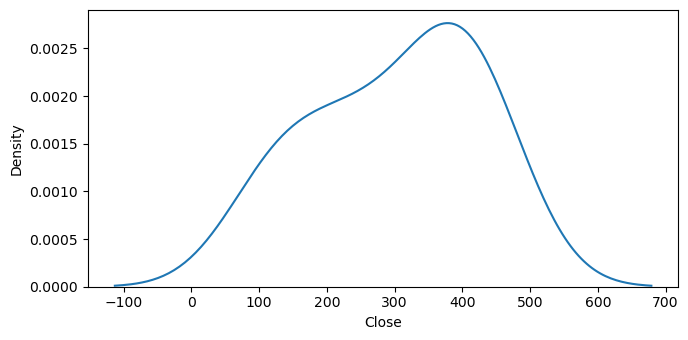

In [196]:
#KDE histogram for all stock prices
fig3 = plt.figure()
sns.kdeplot(data = stockDataSimplified, x = "Close")
plt.show()

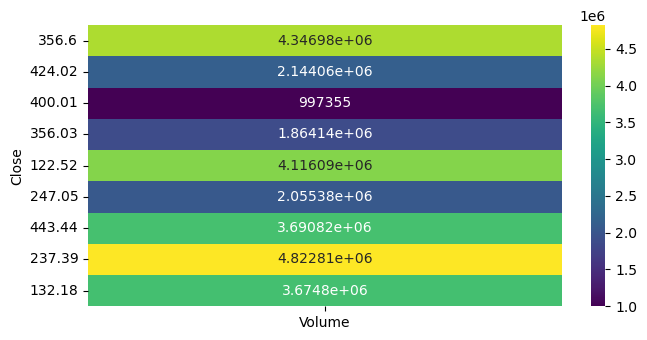

In [197]:
#Heatmap for relation between closing price and volume traded
df_m = stockDataSimplified[["Close","Volume"]]

df_m.set_index("Close", inplace=True)

fig4 = plt.figure()
sns.heatmap(df_m, annot=True, fmt="g", cmap='viridis')
plt.show()

In [ ]:
#adding a new column month to store monthly closing price of stock
stockData["Month"] = pd.DatetimeIndex(stockData["Date"]).month
stockDataMonthly = stockData.loc[stockData["Month"] != stockData["Month"].shift(-1)]
stockData = stockData.drop("Month", axis=1)


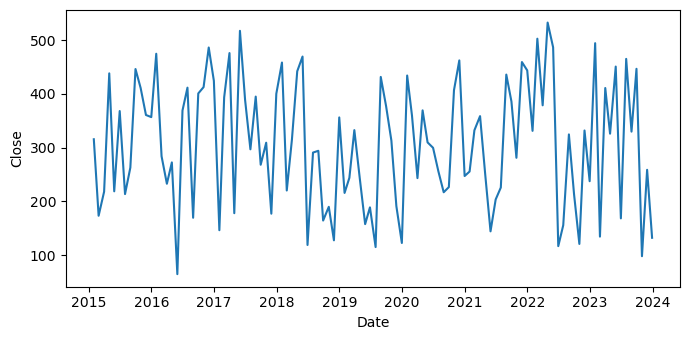

In [198]:
#plotting the monhtly closing price 
fig5 = plt.figure()
sns.lineplot(data = stockDataMonthly, x = "Date", y = "Close")
plt.show()

In [199]:
#Saving all the graph in a single pdf file called "output.pdf"
figs = [fig1, fig2, fig3, fig4, fig5] # list of figures
with PdfPages('output.pdf') as pdf:
    for fig in figs:
        pdf.savefig(fig, bbox_inches='tight') 